In [1]:
import numpy as np
import matplotlib.pyplot as plt


class RouteEnvironment:
    def __init__(self, num_cities):
        self.num_cities = num_cities
        self.cities = np.random.rand(num_cities, 2) * 10 

    def get_distance(self, city1, city2):
        return np.linalg.norm(self.cities[city1] - self.cities[city2])

    def get_reward(self, city):
        if city == self.num_cities - 1:
            return 100  # Reward  -  destination
        else:
            return -1  # Penalty -  intermediate cities

    def plot_route(self, route):
        plt.figure(figsize=(6, 6))
        plt.scatter(self.cities[:, 0], self.cities[:, 1], color='red', label='Cities')
        plt.plot(self.cities[route, 0], self.cities[route, 1], 'b--o', label='Optimal Route')
        plt.scatter(self.cities[0, 0], self.cities[0, 1], color='green', label='Start')
        plt.scatter(self.cities[-1, 0], self.cities[-1, 1], color='blue', label='Destination')
        plt.xlabel('X-coordinate')
        plt.ylabel('Y-coordinate')
        plt.title('Optimal Route')
        plt.legend()
        plt.show()

In [2]:
class QLearningAgent:
    def __init__(self, num_states, num_actions, learning_rate, discount_factor, epsilon):
        self.num_states = num_states
        self.num_actions = num_actions
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.epsilon = epsilon
        self.q_table = np.zeros((num_states, num_actions))

    def get_action(self, state):
        if np.random.uniform(0, 1) < self.epsilon:
            return np.random.randint(self.num_actions)  
        else:
            return np.argmax(self.q_table[state])  

    def update_q_table(self, state, action, reward, next_state):
        max_q_value = np.max(self.q_table[next_state])
        td_error = reward + self.discount_factor * max_q_value - self.q_table[state, action]
        self.q_table[state, action] += self.learning_rate * td_error


Episode 100: Total Reward = 100
Episode 200: Total Reward = 100
Episode 300: Total Reward = 100
Episode 400: Total Reward = 100
Episode 500: Total Reward = 100
Episode 600: Total Reward = 100
Episode 700: Total Reward = 100
Episode 800: Total Reward = 100
Episode 900: Total Reward = 100
Episode 1000: Total Reward = 100
Episode 1100: Total Reward = 100
Episode 1200: Total Reward = 100
Episode 1300: Total Reward = 100
Episode 1400: Total Reward = 100
Episode 1500: Total Reward = 100
Episode 1600: Total Reward = 100
Episode 1700: Total Reward = 98
Episode 1800: Total Reward = 100
Episode 1900: Total Reward = 100
Episode 2000: Total Reward = 100
Episode 2100: Total Reward = 100
Episode 2200: Total Reward = 100
Episode 2300: Total Reward = 100
Episode 2400: Total Reward = 93
Episode 2500: Total Reward = 100
Episode 2600: Total Reward = 100
Episode 2700: Total Reward = 99
Episode 2800: Total Reward = 100
Episode 2900: Total Reward = 100
Episode 3000: Total Reward = 100
Episode 3100: Total Re

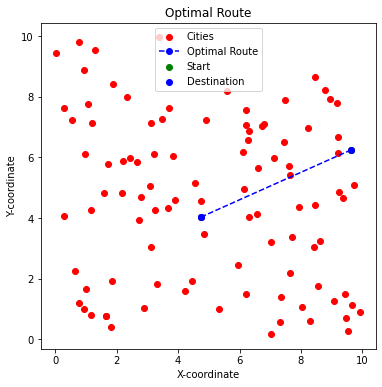

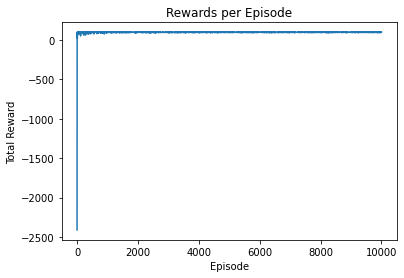

In [3]:

def main():
    num_cities = 100
    num_episodes = 10000
    learning_rate = 0.01
    discount_factor = 0.9
    epsilon = 0.1

    env = RouteEnvironment(num_cities)
    agent = QLearningAgent(num_cities, num_cities, learning_rate, discount_factor, epsilon)

    rewards_per_episode = []

    for episode in range(num_episodes):
        state = 0 
        total_reward = 0

        while state != num_cities - 1: 
            action = agent.get_action(state)
            next_state = action
            reward = env.get_reward(next_state)
            agent.update_q_table(state, action, reward, next_state)
            state = next_state
            total_reward += reward

        rewards_per_episode.append(total_reward)

        if (episode + 1) % 100 == 0:
            print("Episode {}: Total Reward = {}".format(episode + 1, total_reward))

    optimal_route = [0]
    state = 0

    while state != num_cities - 1:
        action = agent.get_action(state)
        optimal_route.append(action)
        state = action

    print("Optimal Route:", optimal_route)
    env.plot_route(optimal_route)
    plt.plot(rewards_per_episode)
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.title('Rewards per Episode')
    plt.show()


if __name__ == '__main__':
    main()